In [7]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, SimpleRNN

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [6]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [8]:
rnn_model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
    ])

In [9]:
rnn_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [10]:
rnn_history = rnn_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 78s 549ms/step - loss: 0.6262 - accuracy: 0.6333 - val_loss: 0.4464 - val_accuracy: 0.8035
Epoch 2/5
137/137 [==============================] - 72s 524ms/step - loss: 0.4085 - accuracy: 0.8230 - val_loss: 0.3759 - val_accuracy: 0.8417
Epoch 3/5
137/137 [==============================] - 70s 510ms/step - loss: 0.3065 - accuracy: 0.8761 - val_loss: 0.4312 - val_accuracy: 0.8007
Epoch 4/5
137/137 [==============================] - 68s 495ms/step - loss: 0.2555 - accuracy: 0.8998 - val_loss: 0.3759 - val_accuracy: 0.8497
Epoch 5/5
137/137 [==============================] - 70s 511ms/step - loss: 0.1912 - accuracy: 0.9286 - val_loss: 0.4135 - val_accuracy: 0.8251


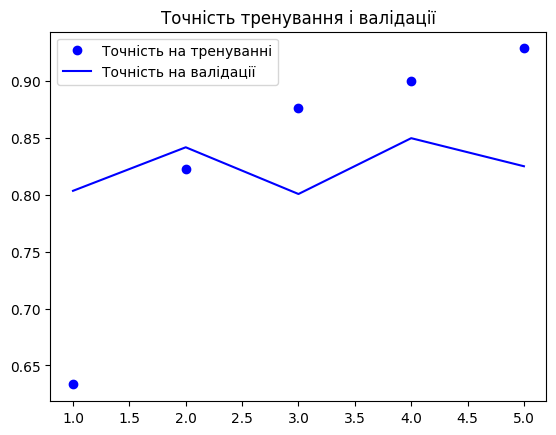

<Figure size 640x480 with 0 Axes>

In [16]:
acc = rnn_history.history['accuracy']
val_acc = rnn_history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()
plt.figure()
plt.show()

In [17]:
test_loss, test_acc = rnn_model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 33s 42ms/step - loss: 0.4063 - accuracy: 0.8285
Test Loss: 0.4062965214252472
Test Accuracy: 0.8285199999809265


In [21]:
models = []

In [22]:
lstm_model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
    ])
models.append(lstm_model)

In [23]:
brnn_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
    ])
models.append(brnn_model)

In [24]:
drnn_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
    ])
models.append(drnn_model)

In [32]:
models_names = ["lstm", "brnn", "drnn"]

In [25]:
for i in models:
  i.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [33]:
for model, name in zip(models, models_names):
  print(name)
  model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

lstm
Epoch 1/5
137/137 [==============================] - 15s 90ms/step - loss: 0.6434 - accuracy: 0.6272 - val_loss: 0.5068 - val_accuracy: 0.7985
Epoch 2/5
137/137 [==============================] - 11s 81ms/step - loss: 0.3984 - accuracy: 0.8313 - val_loss: 0.3359 - val_accuracy: 0.8657
Epoch 3/5
137/137 [==============================] - 10s 70ms/step - loss: 0.2948 - accuracy: 0.8838 - val_loss: 0.2919 - val_accuracy: 0.8785
Epoch 4/5
137/137 [==============================] - 7s 54ms/step - loss: 0.2420 - accuracy: 0.9095 - val_loss: 0.3012 - val_accuracy: 0.8813
Epoch 5/5
137/137 [==============================] - 7s 54ms/step - loss: 0.2079 - accuracy: 0.9226 - val_loss: 0.2870 - val_accuracy: 0.8823
brnn
Epoch 1/5
137/137 [==============================] - 17s 102ms/step - loss: 0.6499 - accuracy: 0.6069 - val_loss: 0.5710 - val_accuracy: 0.6976
Epoch 2/5
137/137 [==============================] - 11s 83ms/step - loss: 0.4194 - accuracy: 0.8185 - val_loss: 0.3412 - val_accurac

In [34]:
for model, name in zip(models, models_names):
  test_loss, test_acc = model.evaluate(input_test, y_test)
  print(f'{name} Test Loss: {test_loss}')
  print(f'{name} Test Accuracy: {test_acc}')
  print('-'*30)

782/782 [==============================] - 7s 9ms/step - loss: 0.3069 - accuracy: 0.8737
lstm Test Loss: 0.3069087564945221
lstm Test Accuracy: 0.8737199902534485
------------------------------
782/782 [==============================] - 11s 14ms/step - loss: 0.6804 - accuracy: 0.7639
brnn Test Loss: 0.6804277896881104
brnn Test Accuracy: 0.7639200091362
------------------------------
782/782 [==============================] - 21s 26ms/step - loss: 0.3783 - accuracy: 0.8443
drnn Test Loss: 0.3782503008842468
drnn Test Accuracy: 0.8442800045013428
------------------------------


In [35]:
# Висновок:

In [36]:
# Як бачимо, найкраще впорались звичайна RNN та LSTM моделі з результатами близько 92% на тренувальних вибірках.
# Проте, ми віддамо перевагу LSTM оскільки на тестових та валідаційних данних результати набагато краще